In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import torch
import statistics

### Compute Distance

In [2]:
def compute_distances_two_loops(x_train, x_test):
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  newtrain = x_train.clone()
  newtrain = newtrain.view(newtrain.shape[0],-1)
  newtest = x_test.clone()
  newtest = newtest.view(newtest.shape[0],-1)

  for i in range(num_train):
    for j in range(num_test):
      temp = newtrain[i]-newtest[j]
      temp = temp**2
      temp = torch.sum(temp)
      temp = torch.sqrt(temp)
      dists[i][j] = temp
  return dists

In [3]:
def predict_labels(dists, y_train, k=1):
  num_train, num_test = dists.shape
  y_pred = torch.zeros(num_test, dtype=torch.int64)
  val,index = torch.topk(dists,k,dim=0,largest=False)
  vote = []
  for i in range(num_test):
        vote.clear()
        for j in range(k):
            vote.append( y_train[index[j][i]] )
        y_pred[i] = max(set(vote),key=vote.count)
  return y_pred

### MyKNN

In [4]:
class KnnClassifier:
  def __init__(self, x_train, y_train):
    self.x_train=x_train    
    self.y_train=y_train
  def predict(self, x_test, k=1):
    y_test_pred = None
    dist = compute_distances_two_loops(self.x_train, x_test)
    y_test_pred = predict_labels(dist, self.y_train, k)
    return y_test_pred

### Load iris data

In [5]:
iris = datasets.load_iris()

iris_data = pd.DataFrame({
    'Sepal length':iris.data[:,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'class':iris.target
})

iris_data
# iris dataset link: https://github.com/dotnet/machinelearning/blob/main/test/data/iris.txt
# class 0 = Iris-setosa
# class 1 = Iris-versicolor
# calss 2 = Iris-virginica

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


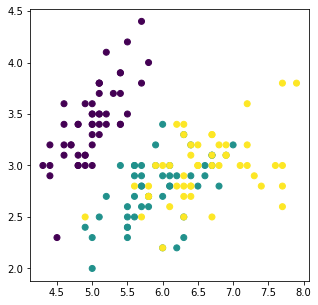

In [6]:
fig = plt.figure(figsize=(5,5))
plt.scatter(iris_data['Sepal length'],iris_data['Sepal width'],c=iris.target)

In [7]:
train_y = iris_data.pop('class')
train_y = np.array(train_y)
train_x = iris_data
train_x = np.array(train_x)

In [8]:
inputdata = []
usedinfo = []
name = ['Sepal length ','Sepal width  ','Petal length ','Petal width  ']
for i in range(4):
    num = float(input(name[i]+': '))
    if(num!=0):
        inputdata.append(num)
        usedinfo.append(i)
inputdata=torch.from_numpy(np.array(inputdata).reshape(1,2))
train_x = torch.from_numpy(train_x[:,usedinfo])


Sepal length : 6.7
Sepal width  : 3.0
Petal length : 0
Petal width  : 0


In [9]:
knn = KnnClassifier(train_x,train_y)

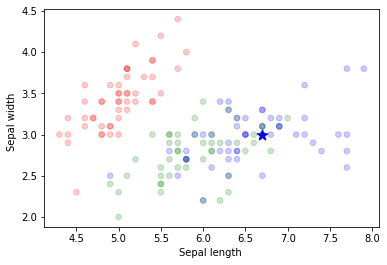

In [10]:
y_test = knn.predict(inputdata,5)
class_colors = ['r', 'g', 'b']
train_colors = [class_colors[c] for c in train_y]
test_colors = [class_colors[c] for c in y_test]
plt.scatter(train_x[:, 0], train_x[:, 1],color=train_colors, marker='o', s=32, alpha=0.2)
plt.scatter(inputdata[:, 0], inputdata[:, 1],color=test_colors, marker='*', s=128.0)
plt.xlabel(name[usedinfo[0]])
plt.ylabel(name[usedinfo[1]])
plt.show()